# Problem Statement

- In this project, Natural Language Processing (NLP) strategies will be used to analyze Yelp reviews data
- Number of 'stars' indicate the business rating given by a customer, ranging from 1 to 5
- 'Cool', 'Useful' and 'Funny' indicate the number of cool votes given by other Yelp Users. 

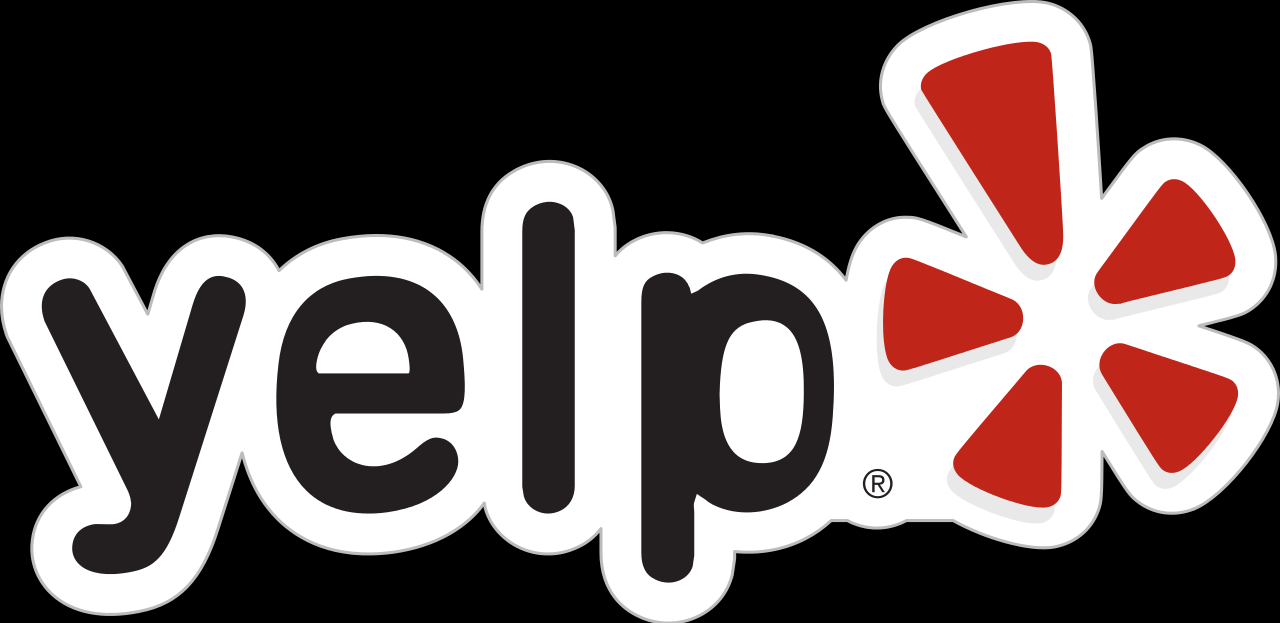

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_df = pd.read_csv('yelp.csv')

In [3]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


# Data Visualisation

No null elements

In [7]:
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [8]:
yelp_df['text'][9999]

'4-5 locations.. all 4.5 star average.. I think Arizona really has some fantastic Pizza options, and Spinatos is at the top of my pizza fix list.. the semi sweet sauce is addictive, great service, fresh ingredients, The Spicy Italian is my favorite... The chocolate chips cookies are laced with mind altering drugs, that make your body parts"romantic" when you think of their cookies.. BTW 5:30pm, on a Tuesday, when we left, a 30 minute wait.. Its on the List..'

In [9]:
yelp_df['length']=yelp_df['text'].apply(len)

In [10]:
yelp_df

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,668
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,881
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,1425
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,880


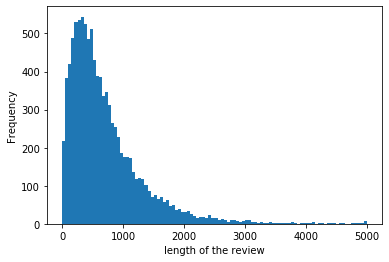

In [11]:
plt.xlabel('length of the review')
yelp_df['length'].plot(bins=100,kind='hist')

In [12]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [13]:
yelp_df[yelp_df['length']== 4997.000000]['text'][55]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

This is the longest review.

In [14]:
yelp_df[yelp_df['length']== 1]['text'].iloc[0]

'X'

This is the shortest review

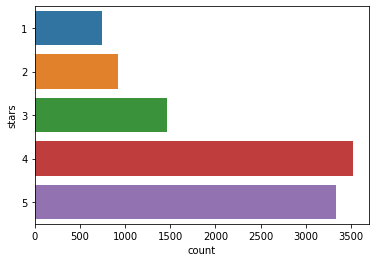

In [15]:
sns.countplot(y='stars',data=yelp_df)

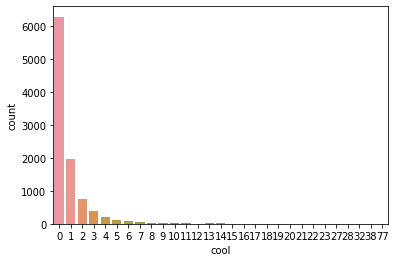

In [16]:
sns.countplot(yelp_df['cool'])

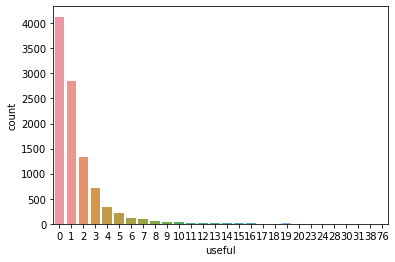

In [17]:
sns.countplot(yelp_df['useful'])

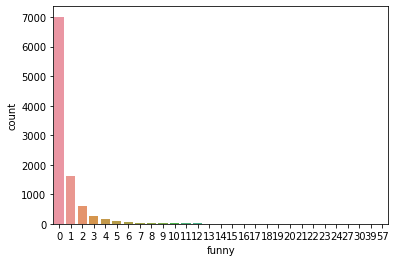

In [18]:
sns.countplot(yelp_df['funny'])

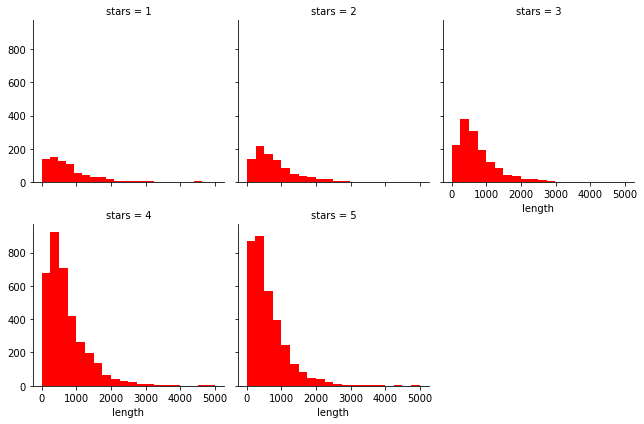

In [19]:
g = sns.FacetGrid(data=yelp_df,col='stars',col_wrap=3)
g.map(plt.hist,'length',bins=20,color='r')

The length of thw reviews corresponding to the star rating doesn't differ in the length as such.

In [20]:
yelp_df_1 = yelp_df[yelp_df['stars']==1]

In [21]:
yelp_df_5 = yelp_df[yelp_df['stars']==5]

In [22]:
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [23]:
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [24]:
yelp_df_1_5 = pd.concat([yelp_df_5,yelp_df_1])

In [25]:
yelp_df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [26]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9987
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [27]:
print('1 star review percentage:',(len(yelp_df_1)/len(yelp_df_1_5)*100))

1 star review percentage: 18.330885952031327


In [28]:
print('5 star review percentage:',81.66911404796868)

5 star review percentage: 81.66911404796868


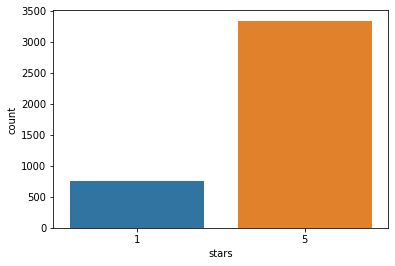

In [29]:
sns.countplot(yelp_df_1_5['stars'])

# Remove Punctuation

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
test = 'Hello, I am from the future! Pandemic wont last long, its gonna end till December 2020!!!'

In [32]:
test_punc_removed = [char   for char in test if char not in string.punctuation]

In [33]:
test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'f',
 'r',
 'o',
 'm',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'f',
 'u',
 't',
 'u',
 'r',
 'e',
 ' ',
 'P',
 'a',
 'n',
 'd',
 'e',
 'm',
 'i',
 'c',
 ' ',
 'w',
 'o',
 'n',
 't',
 ' ',
 'l',
 'a',
 's',
 't',
 ' ',
 'l',
 'o',
 'n',
 'g',
 ' ',
 'i',
 't',
 's',
 ' ',
 'g',
 'o',
 'n',
 'n',
 'a',
 ' ',
 'e',
 'n',
 'd',
 ' ',
 't',
 'i',
 'l',
 'l',
 ' ',
 'D',
 'e',
 'c',
 'e',
 'm',
 'b',
 'e',
 'r',
 ' ',
 '2',
 '0',
 '2',
 '0']

In [34]:
test_punc_removed_joined = ''.join(test_punc_removed)

In [35]:
test_punc_removed_joined

'Hello I am from the future Pandemic wont last long its gonna end till December 2020'

# Remove StopWords

In [36]:
from nltk.corpus import stopwords

In [37]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

So these are the stopwords we are looking to eliminate.

In [38]:
test_punc_removed_joined_cleaned = [word   for word in test_punc_removed_joined.split(' ') if word not in stopwords.words('english')]

In [39]:
test_punc_removed_joined_cleaned

['Hello',
 'I',
 'future',
 'Pandemic',
 'wont',
 'last',
 'long',
 'gonna',
 'end',
 'till',
 'December',
 '2020']

Great!

# Count Vectorizer

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vectorizer = CountVectorizer()

In [42]:
vectorized = vectorizer.fit_transform(test_punc_removed_joined_cleaned)

In [43]:
print(vectorizer.get_feature_names())

['2020', 'december', 'end', 'future', 'gonna', 'hello', 'last', 'long', 'pandemic', 'till', 'wont']


These are the unique words in test_punc_removed_joined_cleaned.

In [44]:
print(vectorized.toarray())

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]]


This matrix shows us the occurance of each unique word in the sentence.

# Lets apply the previous three process to our yelp  reviews!

In [45]:
def message_cleaning(message):
    test_punc_removed = [char   for char in message if char not in string.punctuation]
    test_punc_removed_joined = ''.join(test_punc_removed)
    test_punc_removed_joined_clean = [word   for word in test_punc_removed_joined.split(' ') if word not in stopwords.words('english')]
    return test_punc_removed_joined_clean

In [47]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [50]:
print(yelp_df_clean.iloc[0])#cleaned
print('\n')
print(yelp_df_1_5['text'].iloc[0])#orignal

['My', 'wife', 'took', 'birthday', 'breakfast', 'excellent', '', 'The', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', '', 'Our', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', '', 'It', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better\n\nDo', 'favor', 'get', 'Bloody', 'Mary', '', 'It', 'phenomenal', 'simply', 'best', 'Ive', 'ever', '', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', '', 'It', 'amazing\n\nWhile', 'EVERYTHING', 'menu', 'looks', 'excellent', 'I', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', '', 'It', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', '', 'It', 'best', 'toast', 'Ive', 'ever', 'had\n\nAnyway', 'I', 'cant', 'wait', 'go', 'back']


My wife took me here on my birthday for breakfast and it was excellent.  The 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vectorizer = CountVectorizer(analyzer=message_cleaning)
yelp_vectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [54]:
print(vectorizer.get_feature_names())

['', '\n', '\n\n', '\n\n\n', '\n\n\n\n\n\n', '\n\n\n\nAs', '\n\n\n\nIn', '\n\n\n\nThinking', '\n\n\nCoconut', '\n\n\nDisclaimer', '\n\n\nGood', '\n\n\nI', '\n\n\nKeep', '\n\n\nOn', '\n\n\nShort', '\n\n\nSo', '\n\n\nThe', '\n\n\nThis', '\n\n\nWe', '\n\n\nWhen', '\n\n0', '\n\n1', '\n\n10', '\n\n2', '\n\n20', '\n\n3', '\n\n399', '\n\n4', '\n\n5', '\n\n6', '\n\n610', '\n\n618', '\n\n620', '\n\nA', '\n\nAND', '\n\nAaron', '\n\nAbout', '\n\nAccess', '\n\nAccount', '\n\nAcne', '\n\nAddendum', '\n\nAdding', '\n\nAdditionally', '\n\nAfter', '\n\nAgain', '\n\nAll', '\n\nAlmost', '\n\nAlso', '\n\nAlthough', '\n\nAlways', '\n\nAmazing', '\n\nAmbiance', '\n\nAn', '\n\nAnd', '\n\nAndwait', '\n\nAngela', '\n\nAnother', '\n\nAny', '\n\nAnyway', '\n\nAnyways', '\n\nAppreciated', '\n\nArriving', '\n\nAs', '\n\nAt', '\n\nAtmosphere', '\n\nAtmosphere\nWe', '\n\nAuthentic', '\n\nAverage', '\n\nAwesome', '\n\nBE', '\n\nBEST', '\n\nBOTTOM', '\n\nBTW', '\n\nBabbo', '\n\nBack', '\n\nBad\n1', '\n\nBasically', '

Uphere contains all the unique words present in the yelp text.

In [55]:
print(yelp_vectorizer.toarray())

[[8 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]


This matrix shows the occurance of the unique words in each sentence

In [56]:
yelp_vectorizer.shape

(4086, 31009)

# Model Training

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
nb_classifier = MultinomialNB()

In [59]:
label = yelp_df_1_5['stars'].values

In [60]:
label

array([5, 5, 5, ..., 1, 1, 1], dtype=int64)

In [61]:
X = yelp_vectorizer
y = label

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [64]:
nb_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
prediction = nb_classifier.predict(X_test)

In [67]:
prediction

array([5, 5, 5, ..., 1, 5, 5], dtype=int64)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

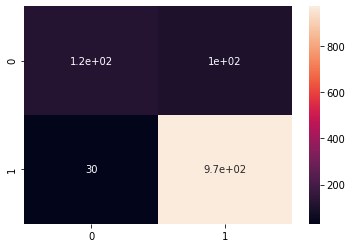

In [70]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [72]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       0.80      0.54      0.65       223
           5       0.91      0.97      0.94      1003

    accuracy                           0.89      1226
   macro avg       0.85      0.76      0.79      1226
weighted avg       0.89      0.89      0.88      1226



In [73]:
print(accuracy_score(y_test,prediction))

0.8923327895595432


# Great! Quite High accuracy